# Bootstrapped Line Fitting

In this notebook, you will use bootstrapping to estimate the uncertainty in the slope and intercept of a line fit to data.

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Generative Model

We start with a generative model:

$$
x \sim U(10,20)
$$

$$
y \sim w x + b + N(0,\sigma^2)
$$

Here are the input parameters we are going to use for this model.

In [2]:
w = 0.75
b = 3.5
sigma = 0.5

Generate two NumPy arrays of 50 points for this model. Store these values in the arrays `x` and `y`:

In [3]:
x = np.random.uniform(10,20, size = 50) 
y = w*x + b + np.random.normal(loc = 0, scale = sigma, size = 50)

Make an appropriately labeled scatter plot of the `x` and `y` data. You should see fluctuations around a straight line. If you don't, you forgot to pass the `size` argument to `np.random.normal` when generating your data above.

Text(0,0.5,'$wx + b + N(0, \\sigma ^2 )$')

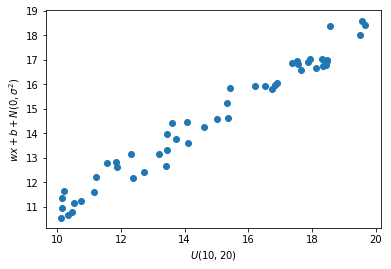

In [4]:
plt.scatter(x,y)
plt.xlabel("$U(10,20)$")
plt.ylabel("$wx + b + N(0, \sigma ^2 )$")

## Fitting the model

In [5]:
from scipy.optimize import minimize

Write a function that computes the MSE for the model $y_{model}(x) = w x + b$:

In [6]:
def mse(theta, x, y):
    """Compute the mean squared error (MSE) for our model.
    
    Parameters
    ----------
    theta: array, list, tuple
        The array of model parameters [w, b].
    x: np.array
        The observed x data.
    y: np.array
        The observed y data.

    """
    
    predicted_y = theta[0]*x + theta[1]
    return 1/(len(x) - 2) * np.sum((y-predicted_y)**2)

Write a function that uses `scipy.optimize.minimize` to minimize the above MSE to find the best value of theta.

In [7]:
def fit(x, y):
    """Fit our model to observed data and return the best values of theta = [w, b]."""
    theta = [.75,3.5]
    fit = minimize(mse, theta, args = (x,y))
    return fit["x"][0], fit["x"][1]
    

Here are the estimated model parameters. These should be close to the true values we used to generate the data:

In [8]:
fit(x,y)

(0.76136004697872461, 3.295686643080781)

In [9]:
w_hat, b_hat = fit(x,y)
w_hat, b_hat

(0.76136004697872461, 3.295686643080781)

Compute the residuals and visualize them with an appropriately labeled histogram:

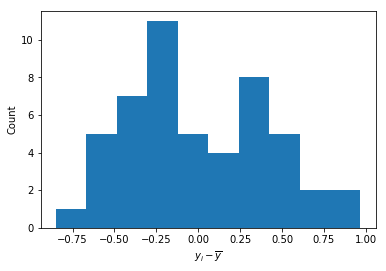

In [10]:
residuals = np.subtract(y, x * w_hat + b_hat)
plt.hist(residuals)
plt.ylabel('Count')
plt.xlabel('$y_i - \overline{y}$');

Compute the $R^2$ for the model:

In [11]:
benchmark_residuals = y - y.mean()

1- residuals.var()/benchmark_residuals.var()

0.96883203436628507

Plot the model predictions (line), on the same plot as the original data (points). Label the two series of data using a legend.

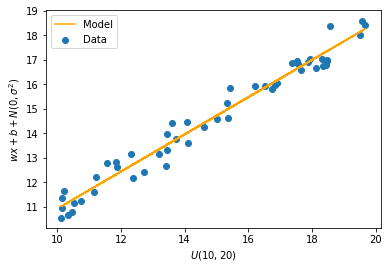

In [12]:
plt.scatter(x,y, label = "Data")
plt.plot(x, x * w_hat + b_hat, label = "Model", color = "orange")
plt.xlabel("$U(10,20)$")
plt.ylabel("$wx + b + N(0, \sigma ^2 )$")
plt.legend()

## Bootstrap

Write a function, `bootstrap`, that can create boostrapped versions of the `x` and `x` arrays above. It is important that you bootstrap pairs of `x[i],y[i]` to preserve correlations in the model. Remember, to bootstrap data you will draw random samples with replacement.

In [13]:
def bootstrap(x, y):
    """Return boostrapped versions of the input X and Y arrays, perserving correlations.
    
    Parameters
    ----------
    x: ndarray
        Input x array.
    y: ndarray
        Input y array.
    
    Returns
    -------
    xx: ndarray
        The boostrapped x array with the same shape as x and correlated random samples
        drawn with replacement.
    yy: ndarray
        The bootstrapped y array with the same shape as y and correlated random samples
        drawn with replacement.
    """
    
    idx = np.random.choice(np.arange(len(x)), size = len(x), replace = True)
    xx = x[idx]
    yy = y[idx]
    return xx, yy
        
    

In [14]:
np.random.seed(0)
a = np.array([0,1,2,3])
b = np.array([4,5,6,7])
ab, bb = bootstrap(a, b)
for element in ab:
    assert element in a
for element in bb:
    assert element in b
assert len(a)==len(ab)
assert len(ab)==len(bb)

Write a function, `bootstrap_fit`, that takes finds the slope and intercept of the input `X` and `Y` data  using the `fit` function above. Your function should perform this fit `n` times using bootstrapped data.

In [15]:
def bootstrap_fit(x, y, n):
    """Fit a straight line to x and y n times using bootstrapping.
    
    Returns
    -------
    (w, b): tuple of ndarrays
        A tuple of 1d arrays with the bootstrapped values of the weight and intercept.
    """
    w_sim = []
    b_sim = []
    for i in range(n):
        xx, yy = bootstrap(x,y)
        x_result, y_result = fit(xx,yy)
        w_sim.append(x_result)
        b_sim.append(y_result)
    return w_sim, b_sim

Using the original `x` and `y` data above:

* Find the bootstrapped weights/slopes and intercepts (bootstrap 200 times).
* Make an appropriately labeled 2d histogram of the bootstrapped slopes and intercepts.
* Find and print the 95% confidence intervals for the slope and intercept.

Text(0,0.5,'Bootstrapped intercept')

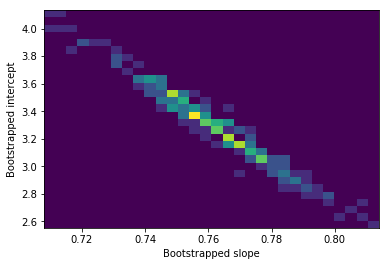

In [16]:
results = bootstrap_fit(x,y, 200)
plt.hist2d(results[0], results[1], bins = 30)
plt.xlabel("Bootstrapped slope")
plt.ylabel("Bootstrapped intercept")

In [17]:
print("95% confidence interval of slope: ", np.percentile(results[0], [2.5,97.5]))
print("95% confidence interval of intercept: ", np.percentile(results[1], [2.5,97.5]))

95% confidence interval of slope:  [ 0.71849229  0.79706089]
95% confidence interval of intercept:  [ 2.75024319  3.89518734]
